In [ ]:
#load the dataset from data folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

#load the dataset
def load_data():
    #load the dataset
    data = pd.read_pickle('data/dataset.pkl')
    return data

#display the first 5 rows of the dataset
def display_data(data):
    print(data.head())

#display the shape of the dataset
def display_shape(data):
    print(data.shape)

#display the columns of the dataset
def display_columns(data):
    print(data.columns)

#display the info of the dataset
def display_info(data):
    print(data.info())

#display the summary of the dataset
def display_summary(data):
    print(data.describe())

#display the missing values in the dataset
def display_missing_values(data):
    print(data.isnull().sum())

CSEDMdata = load_data()
# display_data(data)
# display_shape(data)
# display_columns(data)
display_info(data)



In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, RobertaTokenizer

# tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

tokenizer = RobertaTokenizer.from_pretrained('Salesforce/codet5-base')
model = T5ForConditionalGeneration.from_pretrained('Salesforce/codet5-base')


# input_text = "translate English to German: How old are you?"
input_text = "Write a python code to find the factorial of a number."
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))


In [23]:
from transformers import T5Tokenizer, T5Model, RobertaTokenizer

# Load the model and tokenizer
# model = T5Model.from_pretrained('t5-base')
# tokenizer = T5Tokenizer.from_pretrained('t5-base')#, legacy=False)
# model = T5Model.from_pretrained('t5-large')
# tokenizer = T5Tokenizer.from_pretrained('t5-large')
model = T5Model.from_pretrained('Salesforce/codet5-base')
tokenizer = RobertaTokenizer.from_pretrained('Salesforce/codet5-base')

# Prepare the input
code = "def hello_world():\n\tprint('Hello, world!')"
input_tokenized = tokenizer.encode(code, return_tensors='pt')

# Get the embeddings
# outputs = model(input_tokenized)
outputs = model(input_tokenized, decoder_input_ids=input_tokenized)
embeddings = outputs.last_hidden_state

print(embeddings)

tensor([[[-1.8997, -1.3222, -2.5419,  ..., -3.2594, -2.9218,  0.4835],
         [-2.4098, -2.3832, -2.6746,  ..., -4.8936, -4.4279,  1.3768],
         [-1.4279, -2.5154,  0.6236,  ..., -5.9072, -3.3309,  3.2525],
         ...,
         [ 1.3961,  2.7752,  4.1849,  ...,  1.9767,  0.9882, -2.4475],
         [-5.0775,  1.6399,  8.0260,  ..., -4.2423,  2.2779, -0.7832],
         [-8.7581, -3.6008, -0.2441,  ..., -6.4767,  3.6813,  0.7670]]],
       grad_fn=<MulBackward0>)


In [24]:
print(embeddings.shape)
print(input_tokenized.shape)

torch.Size([1, 16, 768])
torch.Size([1, 16])


In [25]:
import torch 
# Average the embeddings of all tokens to get a single embedding for the whole sequence
sequence_embedding = torch.mean(embeddings, dim=1)

print(sequence_embedding.shape)
print(sequence_embedding)

torch.Size([1, 768])
tensor([[-5.0282e+00,  2.4050e-01,  7.0437e-01, -2.6132e+00,  9.6170e-01,
          5.6242e+00, -8.8750e-01,  5.7651e-01,  1.4758e+00, -7.7664e+00,
          4.0584e-01, -1.1727e+00,  4.9464e-01, -2.0489e+00,  2.2424e+00,
          2.4753e+00,  1.3743e+00,  9.1103e-01, -5.8205e+00, -2.4207e+00,
         -3.9710e+00, -2.3183e+00,  2.4464e+00, -1.8720e+00, -7.8073e-01,
          1.8719e+00, -1.6149e+00, -1.9729e+00, -8.9757e-01,  7.7506e-01,
          4.0548e+00, -6.4697e+00, -2.0912e-01, -7.1927e-01,  1.6348e+00,
         -1.8902e+00, -3.9912e-01, -4.5198e+00, -2.5605e-01,  2.7761e+00,
         -1.2081e+00,  1.2024e+00, -5.6751e-01, -1.0834e+00, -3.3039e+00,
          3.9689e+00, -1.9326e+00, -7.7760e-01,  3.3486e+00, -3.2273e+00,
         -6.0306e+00,  1.6284e+00,  2.3280e-03,  3.7512e+00, -1.3787e+00,
         -2.1533e+00, -9.2229e-02,  2.5328e+00,  9.6285e-01,  5.7108e+00,
          2.0911e+00, -1.6523e+00,  1.9952e+00, -6.0322e-01, -3.7869e-01,
          3.1203e

In [27]:
import torch
model = torch.load('checkpoints/20240530_172907/model')#, map_location='cpu')
print(model)

CustomCERModel(
  (model): T5Model(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear(in_features=3072, out_feat

In [28]:
train_set = torch.load('checkpoints/20240530_172907/train_set')
test_set = torch.load('checkpoints/20240530_172907/test_set')
valid_set = torch.load('checkpoints/20240530_172907/valid_set')

In [18]:
def get_accuracy(model, input_set):
    model.eval()
    correct = 0
    total = 0
    i = 0
    with torch.no_grad():
        for index, row in input_set.iterrows():
            A1 = row['code_i_1']
            A2 = row['code_i_2']
            B1 = row['code_j_1']
            B2 = row['code_j_2']
            target = row['is_similar']
            output = model.forward(A1, A2, B1, B2)
            output = torch.round(torch.sigmoid(output))

            predicted = output
            total += 1
            if (target == True and predicted == 1) or (target == False and predicted == 0):
                correct += 1
            if i % 100 == 0: print(correct, total, predicted, target)
            i += 1
    return correct / total

# train_accuracy = get_accuracy(model, train_set)
test_accuracy = get_accuracy(model, test_set)
valid_accuracy = get_accuracy(model, valid_set)
# print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')
print(f'Valid accuracy: {valid_accuracy}')

0 1 tensor([[0.]], device='cuda:0') True
52 101 tensor([[0.]], device='cuda:0') False
99 201 tensor([[0.]], device='cuda:0') False
150 301 tensor([[0.]], device='cuda:0') True
193 401 tensor([[0.]], device='cuda:0') False
243 501 tensor([[0.]], device='cuda:0') True
300 601 tensor([[0.]], device='cuda:0') False
344 701 tensor([[0.]], device='cuda:0') True
393 801 tensor([[0.]], device='cuda:0') False
441 901 tensor([[0.]], device='cuda:0') False
489 1001 tensor([[0.]], device='cuda:0') False
539 1101 tensor([[0.]], device='cuda:0') True
592 1201 tensor([[0.]], device='cuda:0') False
633 1301 tensor([[0.]], device='cuda:0') True
679 1401 tensor([[0.]], device='cuda:0') True
1 1 tensor([[0.]], device='cuda:0') False
40 101 tensor([[0.]], device='cuda:0') False
87 201 tensor([[0.]], device='cuda:0') False
138 301 tensor([[0.]], device='cuda:0') True
185 401 tensor([[0.]], device='cuda:0') False
245 501 tensor([[0.]], device='cuda:0') False
293 601 tensor([[0.]], device='cuda:0') False
338

In [46]:
def get_latent_states(model, input_set):
    latent_states = []
    i = 0
    for index, row in input_set.iterrows():
        A1_emb = model.get_embeddings(row['code_i_1'])
        A2_emb = model.get_embeddings(row['code_i_2'])
        B1_emb = model.get_embeddings(row['code_j_1'])
        B2_emb = model.get_embeddings(row['code_j_2'])

        # Compute differences
        Da = A2_emb - A1_emb
        Db = B2_emb - B1_emb

        # Pass through the first FC layer
        Da_fc = model.fc1(Da)
        Db_fc = model.fc1(Db)

        latent_states.append(Da_fc.cpu().detach().numpy())
        latent_states.append(Db_fc.cpu().detach().numpy())
        if i > 500:
            break
        i += 1
    return latent_states

latent_states = get_latent_states(model, train_set)
latent_states = np.array(latent_states)
latent_states = latent_states.reshape(-1, latent_states.shape[-1])
print(latent_states.shape)

(1004, 768)


Performing Dimension Reduction


/home/hheickal_umass_edu/.conda/envs/NLP_project/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Downsampling


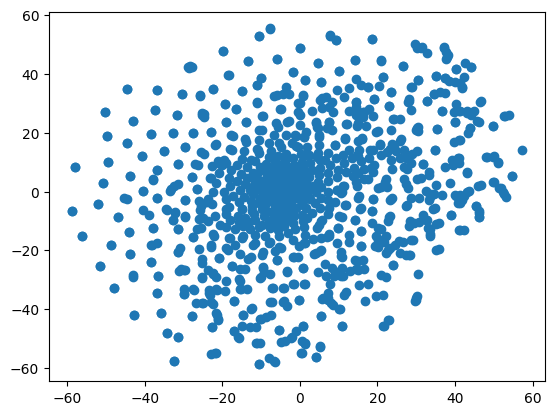

In [47]:
from analysis import *

reduced_states, _ = reduce_latent_states(latent_states, sample_rate=1) 
# Plot the reduced_states as a scatter plot

plt.scatter(reduced_states[:, 0], reduced_states[:, 1])